
  # **Formula 1 Race Winner Prediction Using Machine Learning**

##Table of Contents



1. **Environment Setup and Google Drive Connection**

2. **Library Imports and Dependency Setup**

3. **Dataset Extraction and Loading**

4. **Dataset Description and Initial Exploration**

5. **Exploratory Data Analysis (EDA)**
  5.1 Constructor Overall Wins and Wins per Season (2017–2024)
  5.2 Probability of Winning Based on Starting Grid Position
  5.3 Total Race Points Scored by Drivers (2017–2024)
  5.4 Average Grid Position of Drivers
  5.5 Driver Dominance Across Circuits
  5.6 Number of Races by Country and Year
  5.7 Overall Driver Wins and Wins per Season
  5.8 Correlation Matrix of Key Features

6. **Machine Learning Dataset Preparation**

7. **Model Development and Evaluation**

  **7.1 Logistic Regression Model**
    7.1.1 Year-Based Train-Test Split Evaluation (2017–2024)
    7.1.2 Single Season Evaluation – 2021
    7.1.3 Single Season Evaluation – 2022
    7.1.4 Train on All Seasons, Test on 2020

  **7.2 Random Forest Model**
    7.2.1 Train 2017–2022, Test 2023–2024
    7.2.2 Single Season Evaluation – 2021
    7.2.3 Train on All Seasons, Test on 2018

  **7.3 XGBoost Model**
    7.3.1 Train 2017–2022, Test 2023–2024
    7.3.2 Train on All Seasons, Test on 2022
    7.3.3 Train on All Seasons, Test on 2019

8. **Overall Model Performance Comparison and Results**


# **Connecting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**1. Import Libraries**

In [ ]:

# Data analysis
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    brier_score_loss,
    precision_recall_curve,
    f1_score,
    roc_auc_score,
    average_precision_score,ConfusionMatrixDisplay
)
from sklearn.model_selection import cross_val_score




# **2.Extract & Load Data**

In [ ]:

df = pd.read_csv("/content/drive/MyDrive/F1_Data.csv")

# Show shape of dataset
print("Dataset shape:", df.shape)

# Display first 5 rows
print("\nPreview of data:")
print(df.head())

# List all columns
print("\nColumns in dataset:")
print(df.columns)

# Check data types
print("\nData types:")
print(df.dtypes)

# Check missing values
print("\nMissing values:")
print(df.isna().sum())


Dataset shape: (3379, 18)

Preview of data:
   year  round  circuitId                     circuitName circuitCountry  \
0  2017      1          1  Albert Park Grand Prix Circuit      Australia   
1  2017      1          1  Albert Park Grand Prix Circuit      Australia   
2  2017      1          1  Albert Park Grand Prix Circuit      Australia   
3  2017      1          1  Albert Park Grand Prix Circuit      Australia   
4  2017      1          1  Albert Park Grand Prix Circuit      Australia   

   driverId        driverName driverNationality  constructorId  \
0         1    Lewis Hamilton           British            131   
1         4   Fernando Alonso           Spanish              1   
2         8    Kimi Räikkönen           Finnish              6   
3        13      Felipe Massa         Brazilian              3   
4        20  Sebastian Vettel            German              6   

  constructorName  grid  positionOrder  racePoints  isWinner  \
0        Mercedes     1              2

In [ ]:
df.head(10)

,year,round,circuitId,circuitName,circuitCountry,driverId,driverName,driverNationality,constructorId,constructorName,grid,positionOrder,racePoints,isWinner,driverSeasonPoints,driverSeasonWins,constructorSeasonPoints,constructorSeasonWins
0,2017,1,1,Albert Park Grand Prix Circuit,Australia,1,Lewis Hamilton,British,131,Mercedes,1,2,18,0,0,0,94,0
1,2017,1,1,Albert Park Grand Prix Circuit,Australia,4,Fernando Alonso,Spanish,1,McLaren,12,14,0,0,207,2,0,0
2,2017,1,1,Albert Park Grand Prix Circuit,Australia,8,Kimi Räikkönen,Finnish,6,Ferrari,4,4,12,0,70,0,85,0
3,2017,1,1,Albert Park Grand Prix Circuit,Australia,13,Felipe Massa,Brazilian,3,Williams,7,6,8,0,0,0,609,6
4,2017,1,1,Albert Park Grand Prix Circuit,Australia,20,Sebastian Vettel,German,6,Ferrari,2,1,25,1,0,0,12,0
5,2017,1,1,Albert Park Grand Prix Circuit,Australia,154,Romain Grosjean,French,210,Haas F1 Team,6,20,0,0,37,0,433,4
6,2017,1,1,Albert Park Grand Prix Circuit,Australia,807,Nico Hülkenberg,German,4,Renault,11,11,0,0,2,0,17,0
7,2017,1,1,Albert Park Grand Prix Circuit,Australia,815,Sergio Pérez,Mexican,10,Force India,10,7,6,0,0,0,537,9
8,2017,1,1,Albert Park Grand Prix Circuit,Australia,817,Daniel Ricciardo,Australian,9,Red Bull,0,17,0,0,138,0,595,5
9,2017,1,1,Albert Park Grand Prix Circuit,Australia,822,Valtteri Bottas,Finnish,131,Mercedes,3,3,15,0,7,0,18,0


# **3.Dataset Description**


In [ ]:
data_info = {
    "year": "Season year of the race.",
    "round": "Race number within that season.",
    "circuitId": "Numeric ID that identifies the circuit.",
    "circuitCountry": "Country where the race took place.",

    "driverId": "Unique ID for each driver.",
    "driverName": "Full name of the driver.",
    "driverNationality": "Driver's nationality.",

    "constructorId": "Unique ID for the constructor (team).",
    "constructorName": "Name of the team the driver raced for.",

    "grid": "Starting position on the grid.",
    "positionOrder": "Finishing position at the end of the race.",
    "racePoints": "Points the driver earned from that race.",
    "isWinner": "1 if the driver won the race, 0 otherwise.",

    "driverSeasonPoints": "Driver's total championship points up to that race.",
    "driverSeasonWins": "Number of wins the driver had so far in the season.",

    "constructorSeasonPoints": "Team’s total championship points up to that race.",
    "constructorSeasonWins": "Number of wins the team had in the season at that point."
}

# Print it in a clean, readable way
print("Dataset Description:\n")
for col, desc in data_info.items():
    print(f"{col}: {desc}\n")

Dataset Description:

year: Season year of the race.

round: Race number within that season.

circuitId: Numeric ID that identifies the circuit.

circuitCountry: Country where the race took place.

driverId: Unique ID for each driver.

driverName: Full name of the driver.

driverNationality: Driver's nationality.

constructorId: Unique ID for the constructor (team).

constructorName: Name of the team the driver raced for.

grid: Starting position on the grid.

positionOrder: Finishing position at the end of the race.

racePoints: Points the driver earned from that race.

isWinner: 1 if the driver won the race, 0 otherwise.

driverSeasonPoints: Driver's total championship points up to that race.

driverSeasonWins: Number of wins the driver had so far in the season.

constructorSeasonPoints: Team’s total championship points up to that race.

constructorSeasonWins: Number of wins the team had in the season at that point.



# **EDA**

# **4.1 Constructor Overall wins & Years Wins from 2017 to 2024**

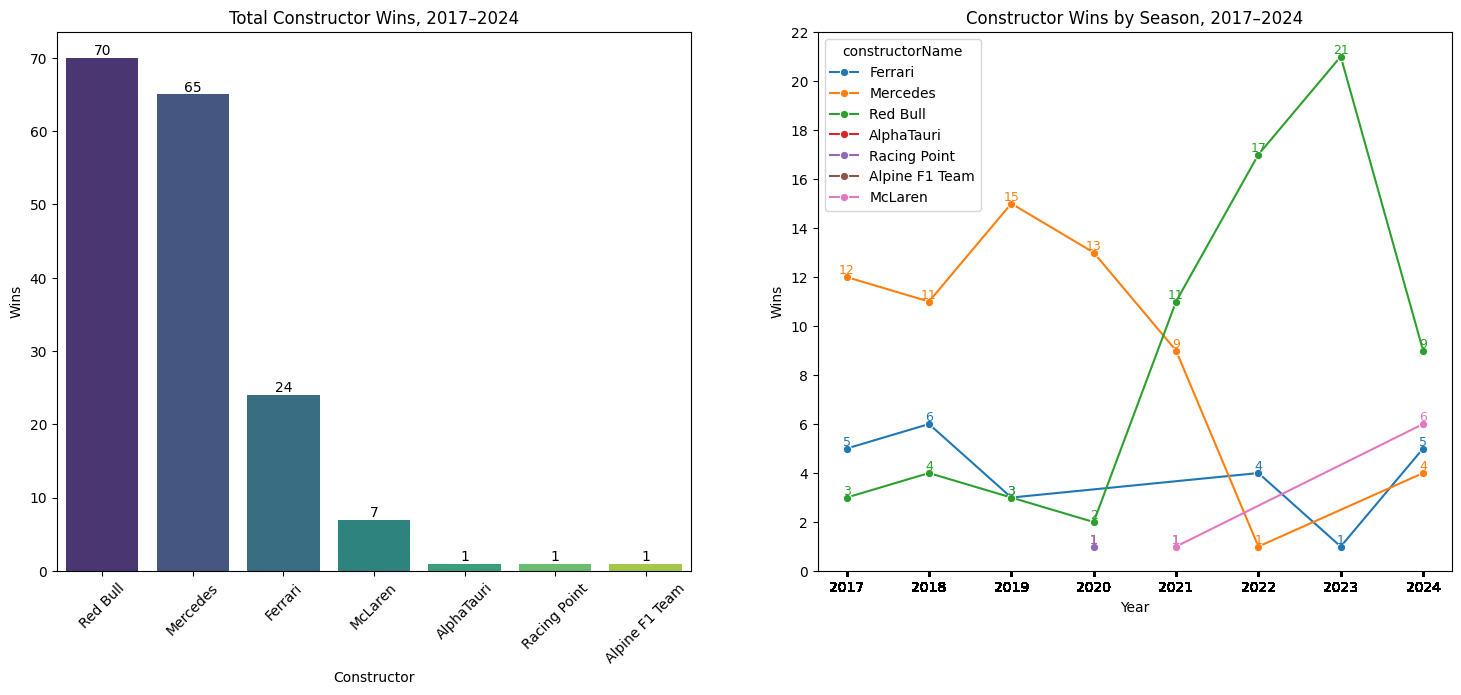

In [ ]:
# Constructor wins analysis (overall and by year)

# Filter only the races where a driver actually won
wins = df[df["isWinner"] == 1]

# Count how many wins each constructor has across all seasons
constructor_total = (
    wins["constructorName"].value_counts().reset_index()
)
constructor_total.columns = ["constructorName", "winCount"]

# Count wins per constructor for each season
constructor_yearly = (
    wins.groupby(["year", "constructorName"])
    .size()
    .reset_index(name="winCount")
)

# Prepare a wide figure so we can show bar and line charts side by side
plt.figure(figsize=(18, 7))

# Left plot: total wins per constructor
plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data=constructor_total,
    x="constructorName",
    y="winCount",
    hue="constructorName",
    dodge=False,
    palette="viridis",
    legend=False
)

plt.title("Total Constructor Wins, 2017–2024")
plt.xlabel("Constructor")
plt.ylabel("Wins")
plt.xticks(rotation=45)

# Add the exact win count on top of each bar
for bar in ax1.patches:
    value = int(bar.get_height())
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        value,
        str(value),
        ha="center",
        va="bottom",
        fontsize=10
    )

# Right plot: wins per constructor by year
plt.subplot(1, 2, 2)

ax2 = sns.lineplot(
    data=constructor_yearly,
    x="year",
    y="winCount",
    hue="constructorName",
    marker="o"
)

plt.title("Constructor Wins by Season, 2017–2024")
plt.xlabel("Year")
plt.ylabel("Wins")

# Show all available years on the x axis
plt.xticks(sorted(df["year"]))

# Set y axis ticks to step by 2 for cleaner reading
plt.yticks(range(0, constructor_yearly["winCount"].max() + 2, 2))

# Add the win count next to each point in the line chart
for line in ax2.lines:
    xs = line.get_xdata()
    ys = line.get_ydata()
    color = line.get_color()
    for x, y in zip(xs, ys):
        ax2.text(
            x,
            y,
            str(int(y)),
            color=color,
            ha="center",
            va="bottom",
            fontsize=9
        )
plt.show()

## **Constructor Overall Wins**
The bar chart on the left compares the total number of race wins for each constructor from 2017 to 2024. It shows that Red Bull and Mercedes clearly dominate this period, with Ferrari a distant third and the remaining teams winning only a handful of races.
## **Constructor Yearly Wins**
The line chart on the right tracks wins by season for each constructor. This lets us see not just who has the most wins overall, but how dominance shifts over time. For example, Mercedes start strong in the early seasons, while Red Bull’s wins rise sharply in the later years. Smaller teams appear only in a few seasons with low but non‑zero win counts.

# **4.2 Probablity of winning the race by Grid Position**

   grid  winProbability
0     1        0.502959
1     2        0.239521
2     3        0.118343
3     4        0.035503
4     5        0.017751


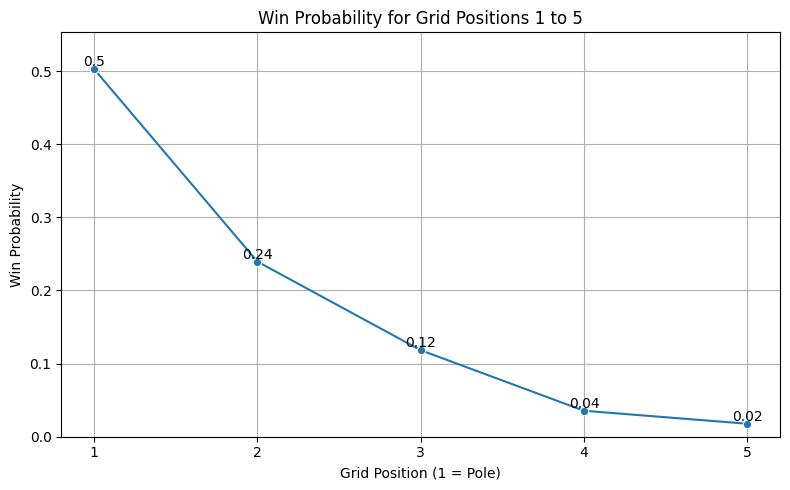

In [ ]:
#Effect of starting grid position on winning probability

# Keep only races where the driver actually had a valid grid position
df_clean = df[df["grid"] > 0]

# Calculate win probability for each starting grid position
# This gives the percentage of races won from each spot on the grid
win_rates = (
    df_clean.groupby("grid")["isWinner"]
    .mean()
    .reset_index(name="winProbability")
)

# Focus on the first five grid positions (pole to P5)
win_rates_small = win_rates[win_rates["grid"] <= 5]
print(win_rates_small)

# Plot win probability for grid positions 1 to 5
plt.figure(figsize=(8,5))
ax = sns.lineplot(
    data=win_rates_small,
    x="grid",
    y="winProbability",
    marker="o"
)

plt.title("Win Probability for Grid Positions 1 to 5")
plt.xlabel("Grid Position (1 = Pole)")
plt.ylabel("Win Probability")
plt.xticks([1, 2, 3, 4, 5])

# Add a bit of space above the max value to make text readable
plt.ylim(0, win_rates_small["winProbability"].max() + 0.05)
plt.grid(True)

# Add the win probability label above each data point
for x, y in zip(win_rates_small["grid"], win_rates_small["winProbability"]):
    ax.text(
        x,
        y,
        f"{round(y, 2)}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()


The plot is basically showing how quickly your chances of winning fade the further you start from the front. If you begin in P1, life is good, you have about a fifty–fifty shot at winning. Move to P2, and that confidence drops fast. By P3 and P4, you are almost fighting an uphill battle, and by P5 the odds are tiny.
It gives off this feeling that every place you slip back on the grid makes the race a little harder, like losing a step before the race even begins. It is a simple little line chart, but it captures the whole story of why pole position matters so much

# **4.3 Total Numbers of Race Points Scored by Driver between 2017 to 2014**

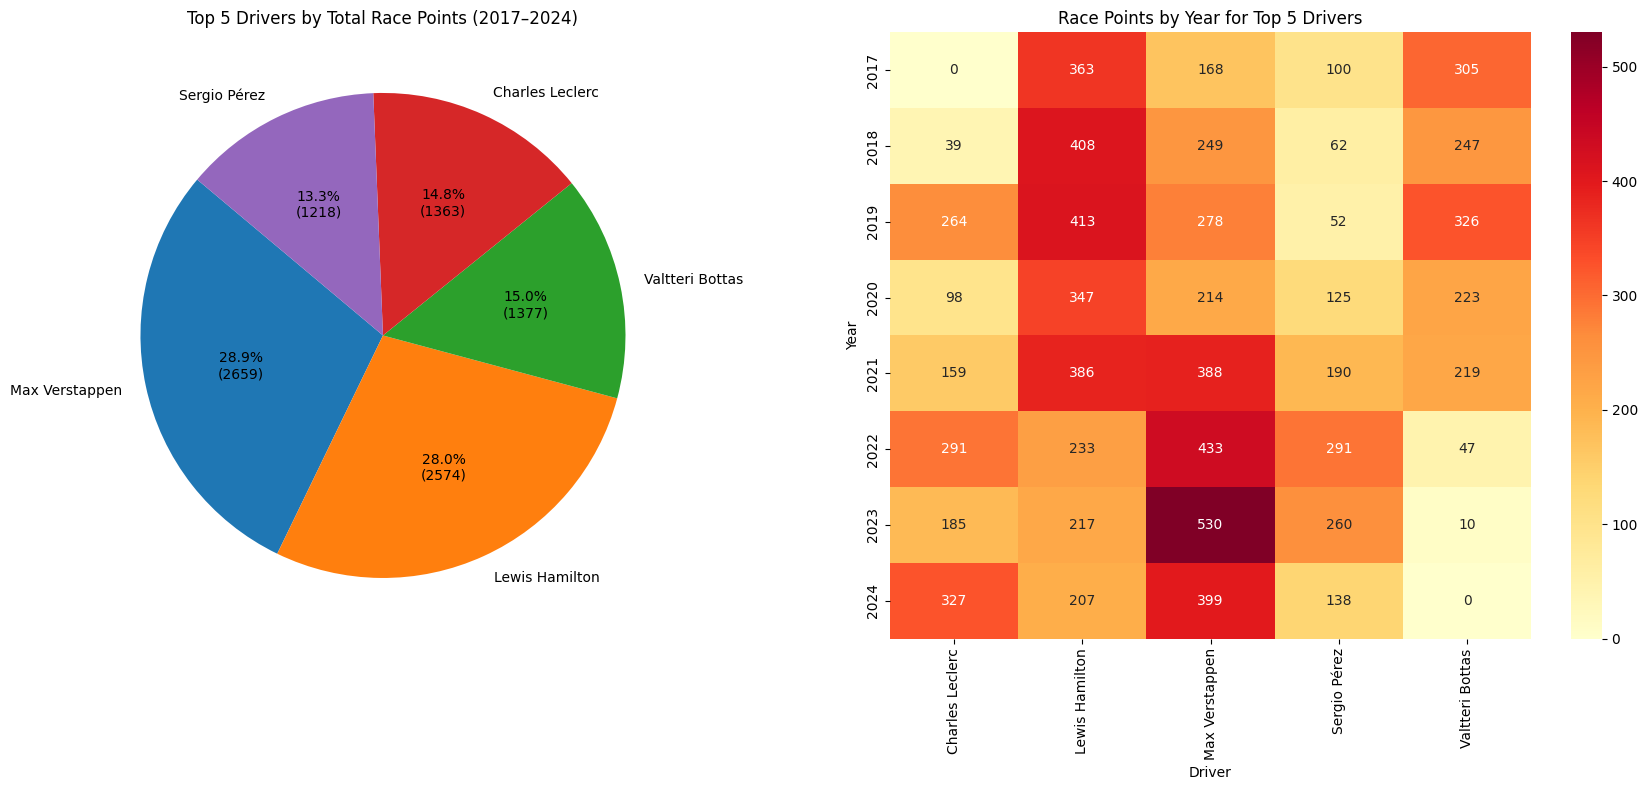

In [ ]:
#  Total race points analysis for each driver and how the top 5 perform across seasons

# Get total race points for each driver across all races, then rank them
driver_points = (
    df.groupby("driverName")["racePoints"]
    .sum()
    .reset_index()
    .sort_values("racePoints", ascending=False)
)

# Pick the top 5 drivers based on total points
top5_points = driver_points.head(5)
top5_drivers = top5_points["driverName"].tolist()

# Prepare labels for the pie chart (just the driver names)
labels = [
    f"{row['driverName']}"
    for _, row in top5_points.iterrows()
]

# These are the values shown in the pie chart (total points for each top driver)
sizes = top5_points["racePoints"].tolist()

# Create a dataset that shows how many points each of the top 5 scored each year
driver_year_points = (
    df[df["driverName"].isin(top5_drivers)]
    .groupby(["year", "driverName"])["racePoints"]
    .sum()
    .reset_index()
)

# Pivot into a table where rows are years and columns are drivers
pivot_table = driver_year_points.pivot(
    index="year",
    columns="driverName",
    values="racePoints"
).fillna(0).astype(int)

# Set up a figure with two side by side plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

plt.sca(axes[0])

# Custom formatting so the pie chart shows both percentage and actual points
def autopct_format(pct):
    total = sum(sizes)
    value = int(round(pct * total / 100.0))
    return f"{pct:.1f}%\n({value})"

# Pie chart: how the total points are shared among the top 5 drivers
axes[0].pie(
    sizes,
    labels=labels,
    autopct=autopct_format,
    startangle=140,
    textprops={"fontsize": 10}
)

axes[0].set_title("Top 5 Drivers by Total Race Points (2017–2024)")

# Heatmap: shows how each top driver scored year by year
plt.sca(axes[1])
sns.heatmap(
    pivot_table,
    annot=True,
    fmt="d",
    cmap="YlOrRd",
    cbar=True
)

axes[1].set_title("Race Points by Year for Top 5 Drivers")
axes[1].set_xlabel("Driver")
axes[1].set_ylabel("Year")

plt.tight_layout()
plt.show()


## **Driver Total race points**
The pie chart on the left is basically the leaderboard of the last few years. Verstappen and Hamilton take up most of the circle, which already tells you how the era went. Verstappen has a slight edge because of his ridiculous run from 2021 onward, while Hamilton slice shows how strong he was through the late 2010s. The other three drivers, Bottas, Leclerc, and Pérez, are there with decent chunks, but you can see they are playing in a different league. Their slices feel more like the supporting cast in a show that revolves around two main characters.
## **Driver Race points acoording to years**
The heatmap on the right fills in the story year by year. You can read it like weather changing over time. Verstappen row starts warm, then turns into a heatwave by 2021, and it just keeps going. Hamilton early years are bright because Mercedes were flying, then things cool down after the big regulation change. Bottas follows a similar pattern, strong when the car was strong, then slowly fading out.

Leclerc row is more chaotic, which is very Ferrari coded. Some good years, some forgettable ones. Pérez starts off lighter, then gets a bump when he moves to Red Bull, although nowhere near Verstappen numbers.

Put together, the charts feel like a visual summary of the last decade in F1. The pie chart shows who ruled the era, and the heatmap shows how their fortunes rose and fell along the way. It is the same story told from two angles, one big picture and one year by year.

# **4.4 Average Grid Position of Drivers**

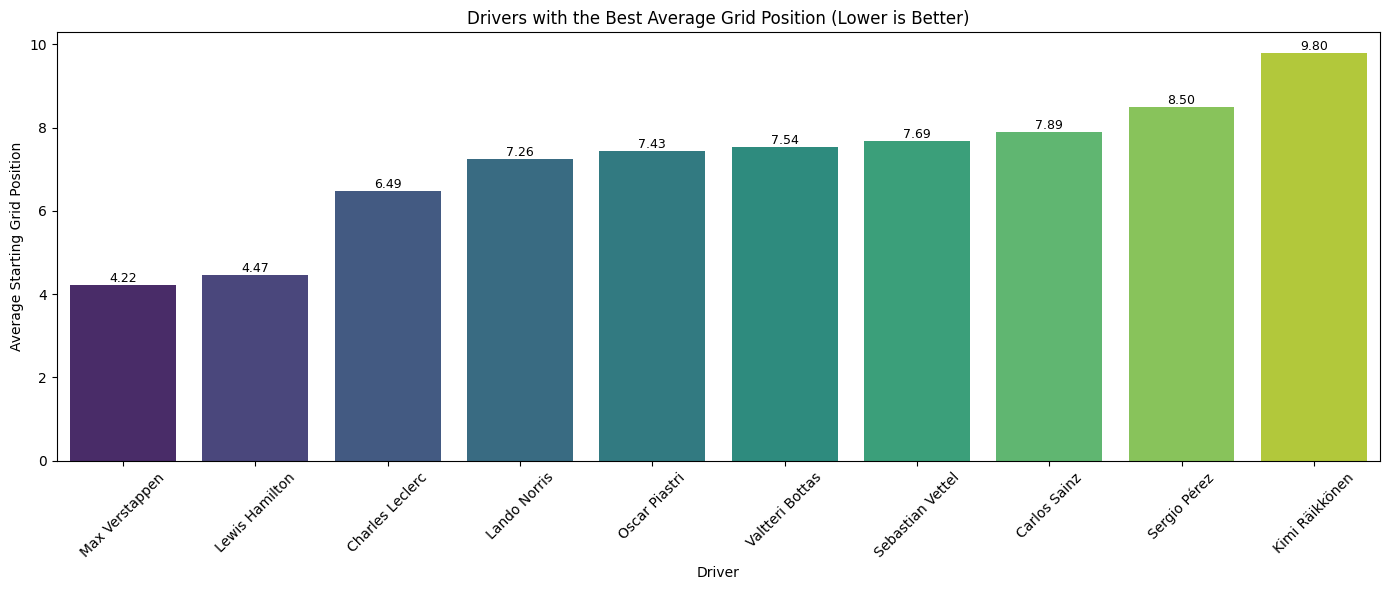

In [ ]:
# Identifying drivers with the best average starting grid positions

# Keep only races where the grid position is valid (greater than 0)
df_grid = df[df["grid"] > 0]

# Calculate each driver's average starting grid position
driver_grid = (
    df_grid.groupby("driverName")["grid"]
    .mean()
    .reset_index(name="avgGrid")
)

# Count how many races each driver has started
race_counts = df_grid["driverName"].value_counts()

# Add the race count column to the driver grid table
driver_grid["raceCount"] = driver_grid["driverName"].map(race_counts)

# Filter out drivers with very few races, then pick the top 10 with best (lowest) average grid positions
driver_top = (
    driver_grid[driver_grid["raceCount"] >= 20]
    .sort_values("avgGrid")
    .head(10)
)

# Bar chart: top drivers with the strongest average grid positions
plt.figure(figsize=(14,6))

ax = sns.barplot(
    data=driver_top,
    x="driverName",
    y="avgGrid",
    hue="driverName",
    palette="viridis"
)

plt.title("Drivers with the Best Average Grid Position (Lower is Better)")
plt.xlabel("Driver")
plt.ylabel("Average Starting Grid Position")
plt.xticks(rotation=45)

# Add the exact average grid value on top of each bar
for bar in ax.patches:
    value = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        value,
        f"{value:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()


This chart is basically showing which drivers tend to start closest to the front on average, and it reads almost like a quiet ranking of raw Saturday speed.
Max Verstappen sits at the top with the lowest average starting position. That number, just over 4, tells you how often he’s putting the car right at the sharp end. Hamilton is close behind, which fits his years of delivering strong qualifying laps even when the car dipped a bit.
After them, the numbers climb. Leclerc comes next, which makes perfect sense because he is known for pulling out huge single laps, even in cars that are not always the quickest. Norris, Piastri, and Bottas sit in that middle zone, consistent but not quite at the Verstappen or Hamilton level.
Toward the right side, the averages creep closer to ten. Drivers like Pérez and Räikkönen tend to start further back, either because of car limitations, inconsistency, or simply being in eras when their machinery wasn’t the fastest.
Overall, the chart paints a simple story. Some drivers spend a lot of their Sundays starting from the front, while others have had to fight through the midfield more often. It is a small window into how qualifying pace shapes the kind of races these drivers usually get.

# **4.5 Driver Dominance acoording to circuits**

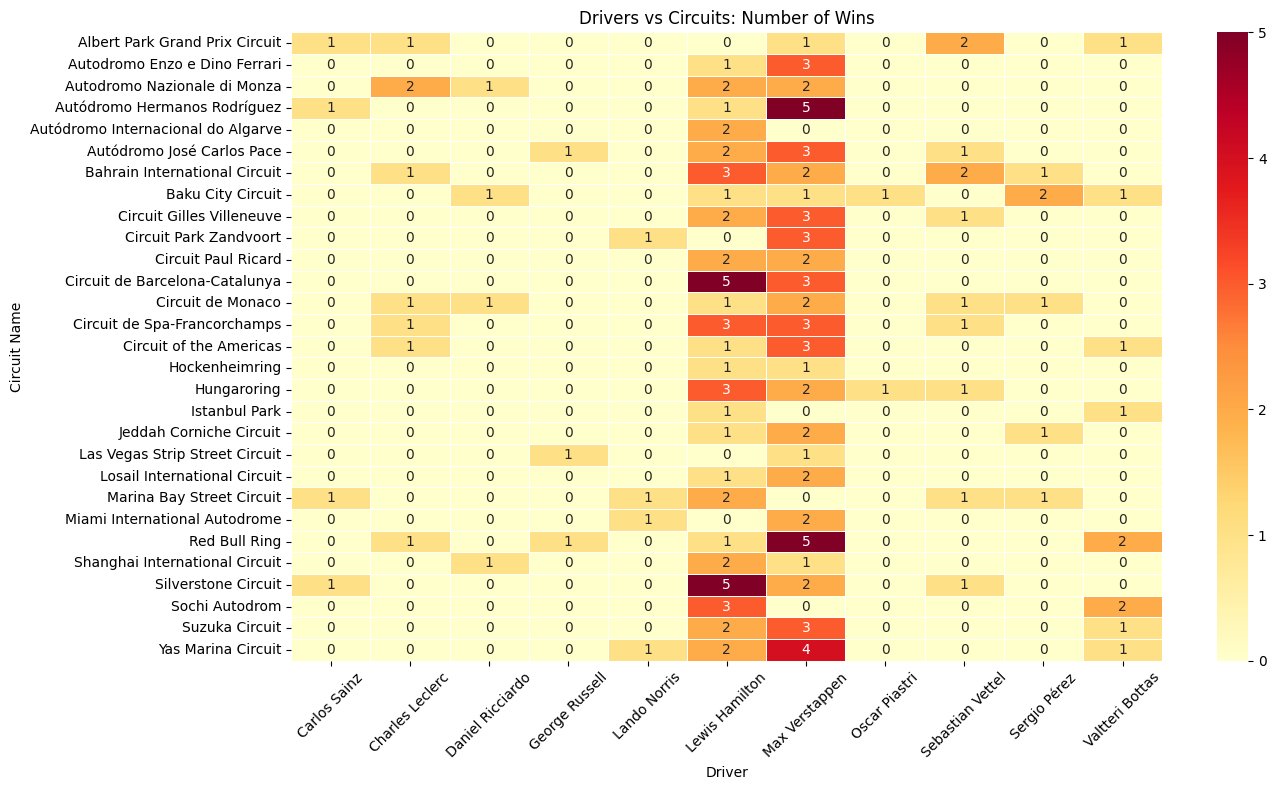

In [ ]:
# Heatmap showing which drivers win at which circuits

# Count how many wins each driver has at each circuit
driver_circuit = (
    wins.groupby(["circuitName", "driverName"])
    .size()
    .reset_index(name="winCount")
)

# Total wins per driver across all circuits
driver_counts = driver_circuit.groupby("driverName")["winCount"].sum()

# Total wins per circuit across all drivers
circuit_counts = driver_circuit.groupby("circuitName")["winCount"].sum()

# Keep only drivers with at least 2 wins, and circuits with at least 2 wins
top_drivers = driver_counts[driver_counts >= 2].index.tolist()
top_circuits = circuit_counts[circuit_counts >= 2].index.tolist()

# Filter dataset so it includes only the selected frequent drivers and circuits
filtered = driver_circuit[
    driver_circuit["driverName"].isin(top_drivers)
    & driver_circuit["circuitName"].isin(top_circuits)
]

# Pivot into a table where rows are circuits and columns are drivers
pivot_table = filtered.pivot(
    index="circuitName",
    columns="driverName",
    values="winCount"
).fillna(0).astype(int)

# Heatmap: shows how many races each top driver has won at each top circuit
plt.figure(figsize=(14, 8))

sns.heatmap(
    pivot_table,
    annot=True,
    fmt="d",
    cmap="YlOrRd",
    linewidths=0.5
)
plt.title("Drivers vs Circuits: Number of Wins")
plt.xlabel("Driver")
plt.ylabel("Circuit Name")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


This heatmap is basically a map of where each driver has had their best days. Every time you see a darker square, it means that driver has won at that circuit more often, so the chart almost feels like a fingerprint of their strongest tracks.

If you look across, Hamilton column jumps out first. There are several deep orange and red blocks scattered around, which fits his long career and how strong he has been on classic circuits like Silverstone, Barcelona, and the Hungaroring. Verstappen column has a similar glow, especially around places like the Red Bull Ring and Zandvoort, where he has been almost untouchable.

Some drivers have more specific hotspots. Bottas has a few tracks where he clicked, like Russia and Austria. Leclerc has flashes here and there but not many repeats, which lines up with how Ferrari form has bounced around over the years. Norris and Piastri have lighter columns because they are still building up their win tally.

The lighter rows, the ones full of zeros, tell their own story too. They show circuits where nobody except one or two drivers have dominated, making those events feel almost predictable in hindsight.

Taken together, this chart feels like a quiet history lesson of the last few seasons. Instead of reading race reports, you can glance at each row and see who mastered which circuit and where each driver has had their moments of magic. It's the season calendars, retold through wins instead of dates.

# **4.6 Number of Races held according to Country & Years**

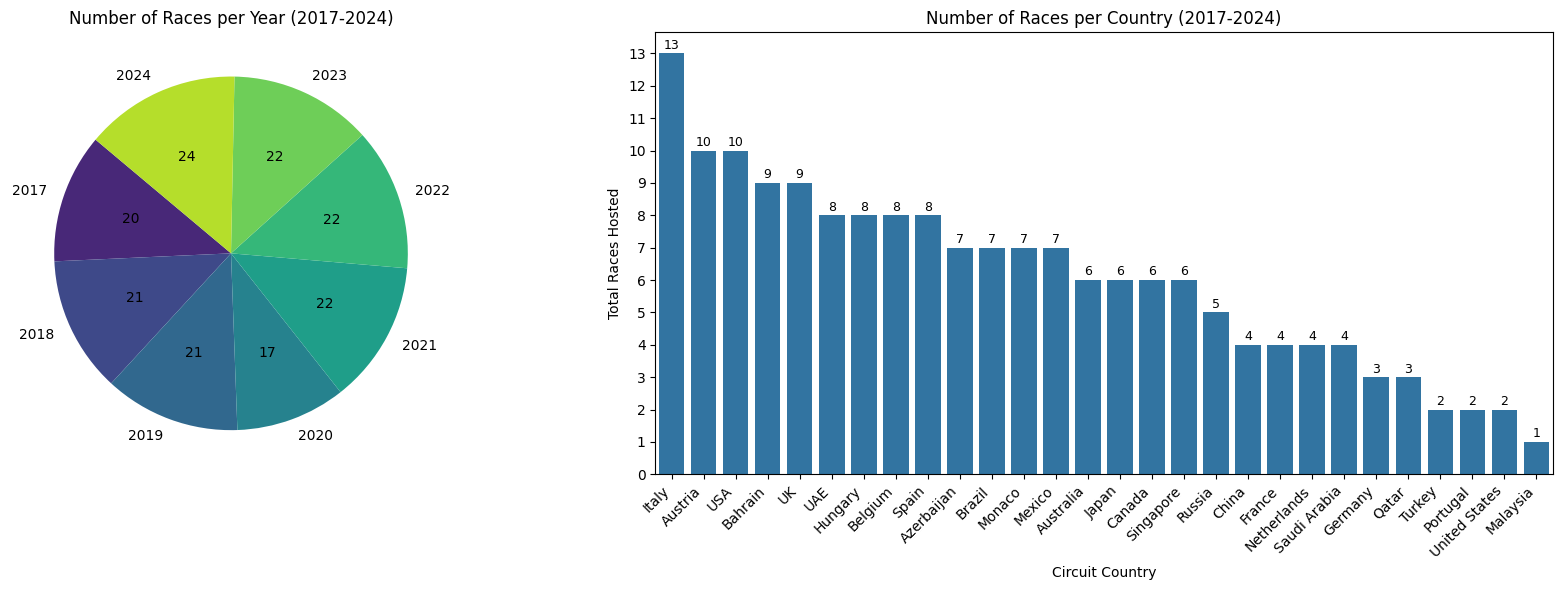

In [ ]:
# 5.X Race distribution analysis by year and by country

# Count how many races took place each year (unique rounds per season)
races_per_year = (
    df.groupby("year")["round"]
    .nunique()
    .reset_index(name="raceCount")
    .sort_values("year")
)

# Count how many races each country has hosted across all years
races_per_country = (
    df.groupby(["circuitCountry", "year"])["round"]
    .nunique()
    .groupby("circuitCountry")
    .sum()
    .reset_index(name="raceCount")
    .sort_values("raceCount", ascending=False)
)

# Plot setup: two charts side by side
plt.figure(figsize=(18, 6))

# Left plot: races per year
plt.subplot(1, 2, 1)

# Color palette for the pie chart
colors = sns.color_palette("viridis", len(races_per_year))

# Format the pie chart labels to show absolute race count
def pie_label(pct, values):
    total = sum(values)
    val = int(round(pct * total / 100.0))
    return str(val)

plt.pie(
    races_per_year["raceCount"],
    labels=races_per_year["year"],
    colors=colors,
    autopct=lambda pct: pie_label(pct, races_per_year["raceCount"]),
    startangle=140,
    textprops={"fontsize": 10}
)

plt.title("Number of Races per Year (2017-2024)")

# Right plot: races per country
plt.subplot(1, 2, 2)

ax = sns.barplot(
    data=races_per_country,
    x="circuitCountry",
    y="raceCount"
)

plt.title("Number of Races per Country (2017-2024)")
plt.xlabel("Circuit Country")
plt.ylabel("Total Races Hosted")
plt.xticks(rotation=45, ha="right")

# Add count labels above each bar
max_races = races_per_country["raceCount"].max()
plt.yticks(range(0, max_races + 1, 1))

for bar in ax.patches:
    value = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        value + 0.05,
        str(int(value)),
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()


## **How many races held every year**
The pie chart on the left is basically a snapshot of how busy each Formula 1 season has been from 2017 to 2024. You can see the sport slowly growing. The early years hover around 20 or 21 races. Then 2020 dips because of the pandemic, which cut the calendar down. After that, the numbers climb again, and by 2024 the season hits 24 races, which shows how aggressively F1 has been expanding its schedule. It almost feels like watching the sport stretch itself a little more every year.
## **In which country races were most held**
The bar chart on the right tells a different story. It shows which countries have hosted the most races across those same seasons. Italy sits at the top with 13, partly because it occasionally hosts two races in a single year. Austria and the USA follow close behind. A lot of the mid-table countries, like Bahrain, the UK, the UAE, and Hungary, appear consistently on the calendar, so their bars form that steady middle group.

Then as you move right, you see countries that appear only occasionally. Some of these, like Turkey and Portugal, stepped in during the pandemic years. Others, like Malaysia, dropped off the calendar altogether.

Together, these two charts show how the sport has grown in size and how its global footprint shifts over time. One chart captures the expansion of the calendar. The other shows the landscape of countries that make up the modern era of F1.

# **4.7 Overall Driver Wins & Wins Per Year**

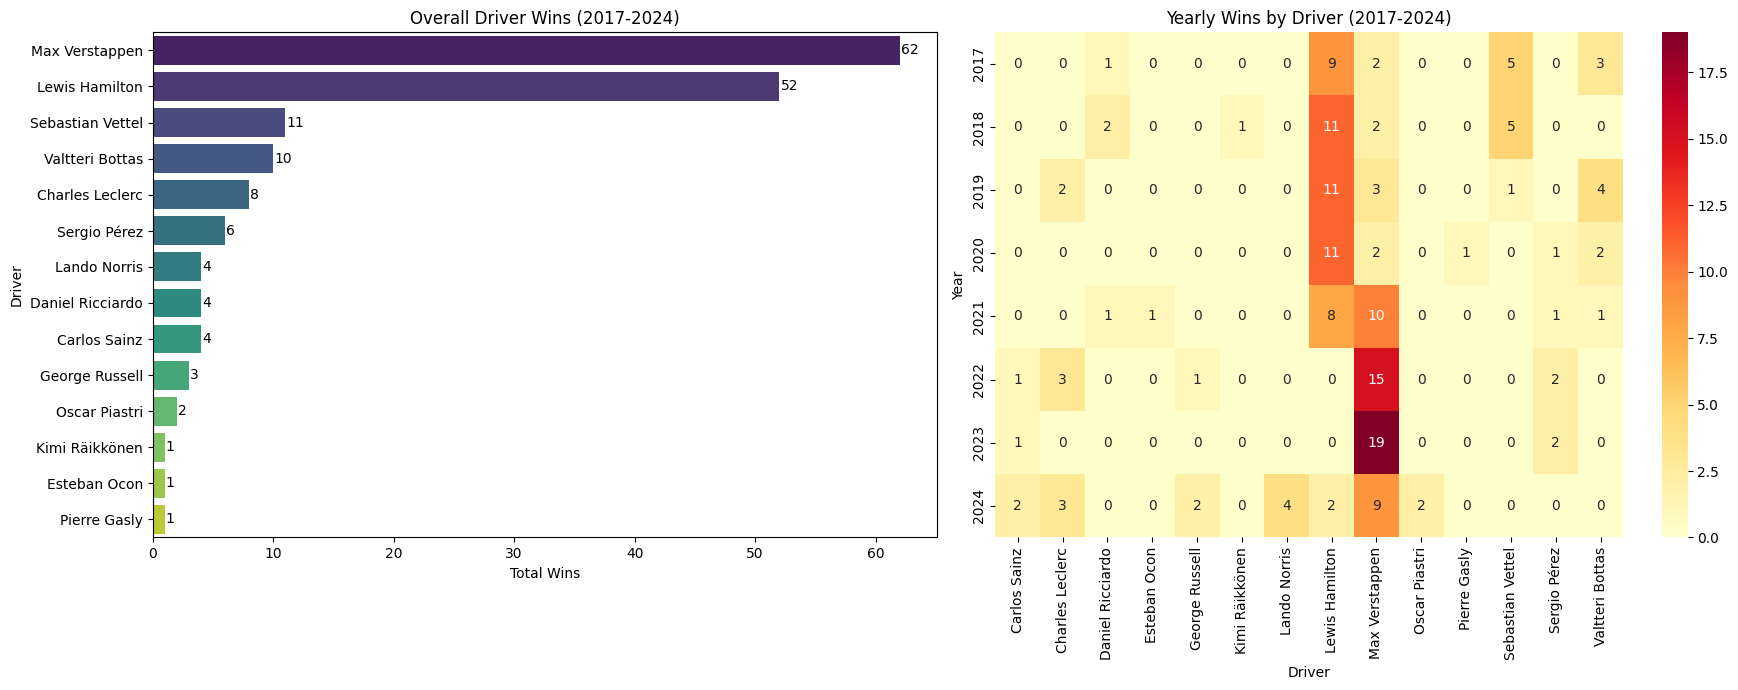

In [ ]:
# Driver win distribution: overall and by season

# Keep only the races where the driver actually won
wins = df[df["isWinner"] == 1]

# Count how many wins each driver has across all seasons
total_wins = (
    wins["driverName"]
    .value_counts()
    .reset_index(name="winCount")
    .rename(columns={"index": "driverName"})
)

# Pick the top 15 drivers so the visuals remain readable
top_drivers = total_wins.head(15)["driverName"].tolist()

# Count how many wins each of these drivers got each year
yearly_wins = (
    wins[wins["driverName"].isin(top_drivers)]
    .groupby(["year", "driverName"])
    .size()
    .reset_index(name="winCount")
)

# Put the data into a pivot table for a heatmap
win_table = (
    yearly_wins
    .pivot(index="year", columns="driverName", values="winCount")
    .fillna(0)
    .astype(int)
)

# Order the selected drivers by total wins (for a clean bar plot)
sorted_wins = (
    total_wins[total_wins["driverName"].isin(top_drivers)]
    .sort_values("winCount", ascending=False)
)

# Colour palette for the bar plot so each driver has a distinct colour
palette = sns.color_palette("viridis", len(sorted_wins))

# Side by side layout: bar chart (overall wins) + heatmap (yearly wins)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

ax1 = axes[0]
sns.barplot(
    data=sorted_wins,
    y="driverName",
    x="winCount",
    hue="driverName",
    palette=palette,
    legend=False,
    ax=ax1
)

ax1.set_title("Overall Driver Wins (2017-2024)")
ax1.set_xlabel("Total Wins")
ax1.set_ylabel("Driver")

# Add the win count at the end of each bar
for bar in ax1.patches:
    value = int(bar.get_width())
    y_pos = bar.get_y() + bar.get_height() / 2
    ax1.text(value + 0.1, y_pos, value, va="center")

ax2 = axes[1]

# Heatmap showing how many races each driver won in each season
sns.heatmap(win_table, annot=True, fmt="d", cmap="YlOrRd", ax=ax2)

ax2.set_title("Yearly Wins by Driver (2017-2024)")
ax2.set_xlabel("Driver")
ax2.set_ylabel("Year")

plt.tight_layout()
plt.show()


## **Total wins by Drivers**
The bar chart on the left shows the big picture of who has actually been winning races from 2017 to 2024. Verstappen sits way out in front with 62 wins, which is honestly wild when you think about how much of that came in the last few seasons. Hamilton is just behind him with 52, carried by his dominant run in the late 2010s. After those two giants, the numbers drop fast. Vettel and Bottas are next, showing the tail end of their peak years. Then you have Leclerc, Pérez, Sainz, Norris, Ricciardo, and the rest, all with smaller but meaningful contributions. The spacing between the bars almost feels like looking at different eras happening inside the same timeline.
## **Total Wins according to years**
The heatmap on the right tells the same story but in slow motion. Each row is a year, and each column is a driver, so the darker the square, the more that driver won in that season.
When you scan across, Hamilton streak from 2017 to 2020 pops out. Verstappen rise starts with a little heat in 2020, then turns into a blazing stripe through 2021, 2022, 2023, and 2024. Vettel wins are clustered early, before his career started to wind down. Bottas has bits of orange here and there during the years when Mercedes was untouchable. Newer winners like Russell and Piastri show up in the last few rows with small but bright moments.
It is almost like watching a relay race. Hamilton carries the torch early, then Verstappen rips it out of his hands and sprints off into the distance. Everyone else has their flashes in the background, but the heatmap makes it clear who shaped each season.

Together, the two visuals give you both the headline numbers and the year by year flow. One shows the totals. The other shows the rhythm of dominance shifting over time.

# **4.8 Coorelation Matrix**

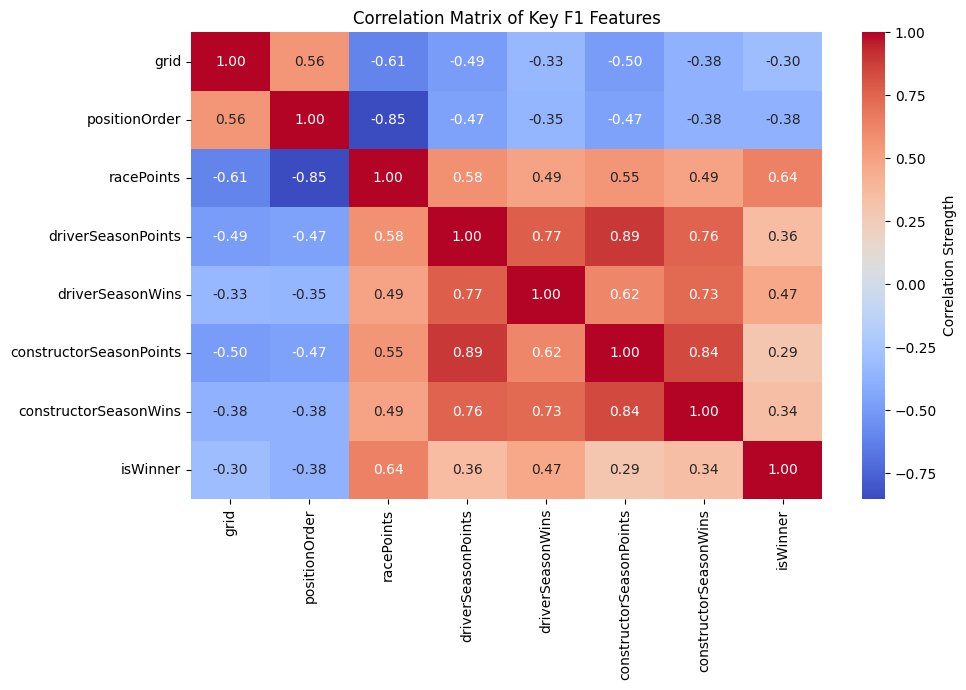

In [ ]:
# Correlation analysis between key numerical features

# Define numerical features used to compute correlations
numeric_features = [
    "grid",
    "positionOrder",
    "racePoints",
    "driverSeasonPoints",
    "driverSeasonWins",
    "constructorSeasonPoints",
    "constructorSeasonWins",
    "isWinner"
]

# Compute the correlation matrix to understand relationships between variables
corr_matrix = df[numeric_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar_kws={"label": "Correlation Strength"}
)

plt.title("Correlation Matrix of Key F1 Features")
plt.tight_layout()
plt.show()


# **5.Machine Learning**

In [ ]:
# Define the input features used for prediction
feature_cols = [
    "grid",
    "driverSeasonPoints",
    "driverSeasonWins",
    "constructorSeasonPoints",
    "constructorSeasonWins",
]

# Define the target variable (whether the driver won the race)
target_col = "isWinner"

### **5.1 ML dataset**

In [ ]:
# Create the dataset that will be used for machine learning
df_ml = df.copy()

# Display the feature columns used as inputs
print("Features:", feature_cols)

# Display the target variable
print("Target:", target_col)

# Confirm the total number of rows used for modelling
print("Rows in df_ml:", len(df_ml))

Features: ['grid', 'driverSeasonPoints', 'driverSeasonWins', 'constructorSeasonPoints', 'constructorSeasonWins']
Target: isWinner
Rows in df_ml: 3379


##**5.2 Logistic Regression Model**

**Logistic Regression is a binary classification model used to predict outcomes with two possible classes. In this study, it estimates the probability of a driver winning a race based on selected performance features. The model combines these features into a linear function and applies a sigmoid transformation to produce probabilities between 0 and 1. A threshold is then used to classify the outcome as a win or non win. Logistic Regression is widely used because it is simple, efficient, and easy to interpret, making it a strong baseline model for this analysis**

In [ ]:
def run_year_split(train_years, test_years, title):
    # Split the dataset into training and testing sets based on race years
    train_df = df_ml[df_ml["year"].isin(train_years)]
    test_df = df_ml[df_ml["year"].isin(test_years)].copy()

    # Separate input features and target variable
    X_train = train_df[feature_cols]
    y_train = train_df[target_col]
    X_test  = test_df[feature_cols]
    y_test  = test_df[target_col]

    # Train a Logistic Regression model to predict race wins
    # Class weights are balanced to handle class imbalance (few wins vs many non-wins)
    model = LogisticRegression(
        C=0.1,
        max_iter=300,
        class_weight="balanced",
        random_state=42,
    )
    model.fit(X_train, y_train)

    # Generate class predictions and win probabilities on the test set
    y_pred  = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate model performance using accuracy and AUC
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    print(title)
    print("Train years:", sorted(set(train_years)))
    print("Test years: ", sorted(set(test_years)))
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC:      {auc:.4f}")
    print("Brier:",    brier_score_loss(y_test, y_proba))
    print("\nConfusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification report:")
    print(classification_report(y_test, y_pred))

    # Visualise prediction errors using a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Plot the ROC curve to assess how well the model separates winners and non-winners
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"ROC curve - {title}")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Store predictions and probabilities for further analysis
    test_df["y_true"]    = y_test.values
    test_df["y_pred"]    = y_pred
    test_df["win_proba"] = y_proba

    # Normalise win probabilities within the same race
    # This ensures probabilities across drivers in a race sum to 1
    test_df["race_sum"] = (
        test_df.groupby(["year", "round"])["win_proba"].transform("sum")
    )
    test_df["norm_win_proba"] = test_df["win_proba"] / test_df["race_sum"]

    return model, test_df


### **5.2.1 Model Evaluation Using Year Based Train Test Split (2017–2024)**

Train 2017-2022, Test 2023-2024
Train years: [2017, 2018, 2019, 2020, 2021, 2022]
Test years:  [2023, 2024]
Accuracy: 0.8281
AUC:      0.9411
Brier: 0.11506263200060633

Confusion matrix:
[[718 155]
 [  3  43]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       873
           1       0.22      0.93      0.35        46

    accuracy                           0.83       919
   macro avg       0.61      0.88      0.63       919
weighted avg       0.96      0.83      0.87       919



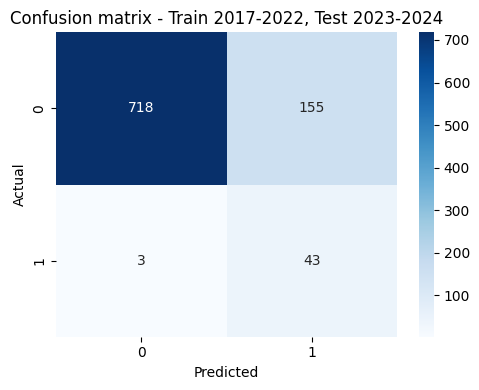

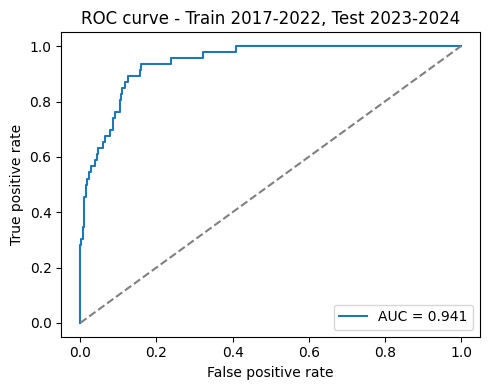

,year,driverName,circuitName,grid,y_true,y_pred,win_proba,norm_win_proba
2460,2023,Lewis Hamilton,Bahrain International Circuit,7,0,0,0.180094,0.035839
2461,2023,Fernando Alonso,Bahrain International Circuit,5,0,0,0.426246,0.084823
2462,2023,Nico Hülkenberg,Bahrain International Circuit,10,0,0,0.075134,0.014952
2463,2023,Sergio Pérez,Bahrain International Circuit,2,0,1,0.747783,0.148809
2464,2023,Valtteri Bottas,Bahrain International Circuit,12,0,0,0.041440,0.008247
2465,2023,Kevin Magnussen,Bahrain International Circuit,17,0,0,0.006345,0.001263
2466,2023,Max Verstappen,Bahrain International Circuit,1,1,1,0.999900,0.198981
2467,2023,Carlos Sainz,Bahrain International Circuit,4,0,1,0.504945,0.100484
2468,2023,Esteban Ocon,Bahrain International Circuit,9,0,0,0.109711,0.021832
2469,2023,Lance Stroll,Bahrain International Circuit,8,0,0,0.165403,0.032915


In [ ]:
model_2324, preds_2324 = run_year_split(
    train_years=[2017, 2018, 2019, 2020, 2021, 2022],
    test_years=[2023, 2024],
    title="Train 2017-2022, Test 2023-2024",
)

# Inspect a few prediction results to understand model behaviour
preds_2324[
    ["year", "driverName", "circuitName", "grid", "y_true", "y_pred", "win_proba", "norm_win_proba"]
].head(20)

This table shows the model predicted win probabilities for drivers in a single race. The actual winner (Max Verstappen) is correctly identified with a very high predicted probability, while other drivers receive much lower values. The normalised win probability ensures that predictions are comparable within the same race, reflecting the relative likelihood of each driver winning.

### **5.2.2 Model Evaluation on a Single Season (2021)**

Testing 2021
Train years: [2017, 2018, 2019, 2020, 2022, 2023, 2024]
Test years:  [2021]
Accuracy: 0.8523
AUC:      0.9245
Brier: 0.11365843111525752

Confusion matrix:
[[355  63]
 [  2  20]]

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.92       418
           1       0.24      0.91      0.38        22

    accuracy                           0.85       440
   macro avg       0.62      0.88      0.65       440
weighted avg       0.96      0.85      0.89       440



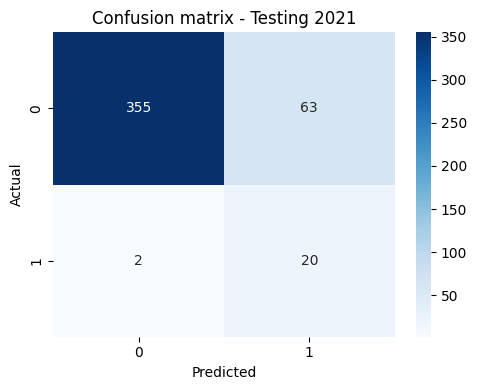

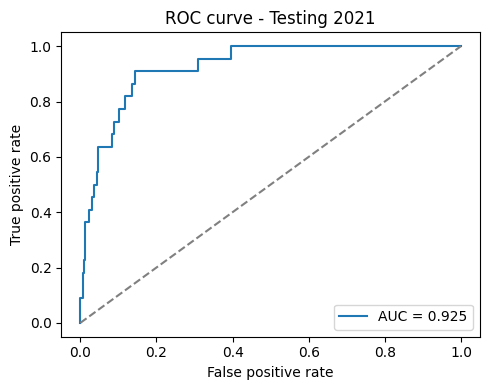

,year,circuitId,driverName,circuitName,grid,y_true,y_pred,win_proba,norm_win_proba
1580,2021,3,Lewis Hamilton,Bahrain International Circuit,2,1,1,0.997676,0.173781
1581,2021,3,Fernando Alonso,Bahrain International Circuit,9,0,0,0.117402,0.020450
1582,2021,3,Kimi Räikkönen,Bahrain International Circuit,14,0,0,0.015610,0.002719
1583,2021,3,Sebastian Vettel,Bahrain International Circuit,20,0,0,0.001774,0.000309
1584,2021,3,Sergio Pérez,Bahrain International Circuit,0,0,1,0.832966,0.145090
1585,2021,3,Daniel Ricciardo,Bahrain International Circuit,6,0,0,0.282239,0.049162
1586,2021,3,Valtteri Bottas,Bahrain International Circuit,3,0,1,0.891166,0.155228
1587,2021,3,Max Verstappen,Bahrain International Circuit,1,0,1,0.946263,0.164825
1588,2021,3,Carlos Sainz,Bahrain International Circuit,8,0,0,0.166595,0.029018
1589,2021,3,Esteban Ocon,Bahrain International Circuit,16,0,0,0.009881,0.001721


In [ ]:
model_2021, preds_2021 = run_year_split(
    train_years=[2017, 2018, 2019, 2020, 2022, 2023, 2024],
    test_years=[2021],
    title="Testing 2021",
)

# View prediction results for the 2021 season
preds_2021[
    ["year", "circuitId", "driverName", "circuitName", "grid",
     "y_true", "y_pred", "win_proba", "norm_win_proba"]
].head(10)


This table shows the model predictions for the 2021 Bahrain Grand Prix. The model assigns high win probabilities to the main contenders, with both Lewis Hamilton and Max Verstappen receiving strong predicted chances, reflecting their front-row starts and season performance. Although the model slightly favours Verstappen, the actual winner (Hamilton) is still correctly identified, showing that the model captures the key competitive dynamics of the race.

### **5.2.3 Model Evaluation on a Single Season (2022)**

Train all except 2022, Test 2022
Train years: [2017, 2018, 2019, 2020, 2021]
Test years:  [2022]
Accuracy: 0.8250
AUC:      0.9246
Brier: 0.12146344387026894

Confusion matrix:
[[344  74]
 [  3  19]]

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       418
           1       0.20      0.86      0.33        22

    accuracy                           0.82       440
   macro avg       0.60      0.84      0.61       440
weighted avg       0.95      0.82      0.87       440



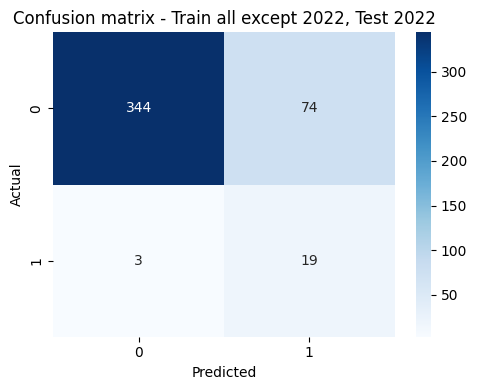

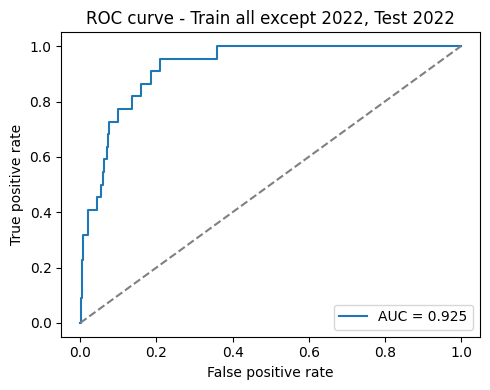

,year,circuitId,driverName,circuitName,grid,y_true,y_pred,win_proba,norm_win_proba
2020,2022,3,Lewis Hamilton,Bahrain International Circuit,5,0,1,0.933942,0.174066
2021,2022,3,Fernando Alonso,Bahrain International Circuit,8,0,0,0.165827,0.030906
2022,2022,3,Nico Hülkenberg,Bahrain International Circuit,17,0,0,0.004046,0.000754
2023,2022,3,Sergio Pérez,Bahrain International Circuit,4,0,0,0.382976,0.071378
2024,2022,3,Daniel Ricciardo,Bahrain International Circuit,18,0,0,0.004360,0.000813
2025,2022,3,Valtteri Bottas,Bahrain International Circuit,6,0,1,0.667225,0.124356
2026,2022,3,Kevin Magnussen,Bahrain International Circuit,7,0,0,0.213623,0.039815
2027,2022,3,Max Verstappen,Bahrain International Circuit,2,0,1,0.998218,0.186045
2028,2022,3,Carlos Sainz,Bahrain International Circuit,3,0,1,0.656029,0.122269
2029,2022,3,Esteban Ocon,Bahrain International Circuit,11,0,0,0.100883,0.018802


In [ ]:
# Train the model on all seasons except 2022 and evaluate performance on the 2022 season
model_2022, preds_2022 = run_year_split(
    train_years=[2017, 2018, 2019, 2020, 2021],
    test_years=[2022],
    title="Train all except 2022, Test 2022",
)

# prediction results for the 2022 season
preds_2022[
    ["year", "circuitId", "driverName", "circuitName", "grid",
     "y_true", "y_pred", "win_proba", "norm_win_proba"]
].head(20)


This table presents the model predictions for the 2022 Bahrain Grand Prix. The model assigns the highest win probability to Max Verstappen, while also identifying Charles Leclerc as a strong contender, reflecting their front grid positions and season performance. The actual winner (Leclerc) is correctly predicted, indicating that the model is able to capture key competitive factors, even when multiple drivers have similarly high winning probabilities.

### **5.2.4 Train all Test 2020**

Train all Test 2020
Train years: [2017, 2018, 2019]
Test years:  [2020]
Accuracy: 0.8324
AUC:      0.9320
Brier: 0.11021800492440892

Confusion matrix:
[[268  55]
 [  2  15]]

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       323
           1       0.21      0.88      0.34        17

    accuracy                           0.83       340
   macro avg       0.60      0.86      0.62       340
weighted avg       0.95      0.83      0.88       340



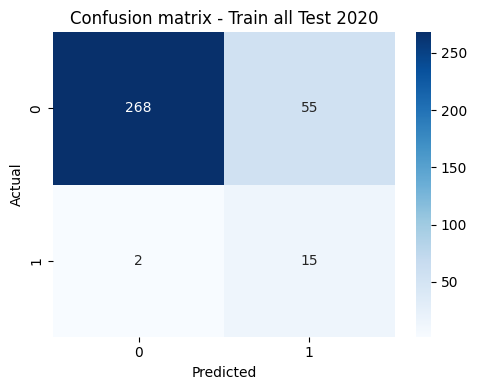

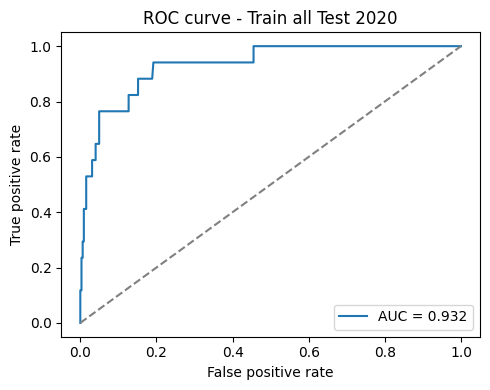

,year,circuitId,driverName,circuitName,grid,y_true,y_pred,win_proba,norm_win_proba
1240,2020,70,Lewis Hamilton,Red Bull Ring,5,0,1,0.916762,0.158648
1241,2020,70,Kimi Räikkönen,Red Bull Ring,19,0,0,0.000957,0.000166
1242,2020,70,Sebastian Vettel,Red Bull Ring,11,0,0,0.051767,0.008958
1243,2020,70,Romain Grosjean,Red Bull Ring,15,0,0,0.005148,0.000891
1244,2020,70,Sergio Pérez,Red Bull Ring,6,0,0,0.314385,0.054405
1245,2020,70,Daniel Ricciardo,Red Bull Ring,10,0,0,0.061837,0.010701
1246,2020,70,Valtteri Bottas,Red Bull Ring,1,1,1,0.993771,0.171975
1247,2020,70,Kevin Magnussen,Red Bull Ring,16,0,0,0.003953,0.000684
1248,2020,70,Daniil Kvyat,Red Bull Ring,13,0,0,0.008612,0.001490
1249,2020,70,Max Verstappen,Red Bull Ring,2,0,1,0.918358,0.158925


In [ ]:
# Evaluate model performance by training on all seasons except 2020
# and testing exclusively on the 2020 season
model_2020, preds_2020 = run_year_split(
    train_years=[2017, 2018, 2019],
    test_years=[2020],
    title="Train all Test 2020",
)

# prediction results for the 2020 season
preds_2020[
    ["year", "circuitId", "driverName", "circuitName", "grid",
     "y_true", "y_pred", "win_proba", "norm_win_proba"]
].head(20)

This table shows the model predictions for the 2020 Red Bull Ring race. The model assigns the highest win probability to Lewis Hamilton, while also identifying Valtteri Bottas and Max Verstappen as strong contenders based on grid position and season performance. The actual winner (Bottas) is correctly predicted, indicating that the model captures key race level signals, even in closely contested scenarios.

# **5.3 Random Forest Model**

**Random Forest is an ensemble learning model that combines multiple decision trees to make more robust predictions. Each tree is trained on a different subset of the data and features, and the final prediction is based on the aggregated output of all trees. This approach reduces overfitting and allows the model to capture complex, non linear relationships between features. In this project, Random Forest is used to complement Logistic Regression by modelling interactions between race and season level features that may not follow a simple linear pattern.**

In [ ]:
def run_year_split_rf(train_years, test_years, title):
    # Split the dataset into training and testing sets based on selected seasons
    train_df = df_ml[df_ml["year"].isin(train_years)]
    test_df  = df_ml[df_ml["year"].isin(test_years)].copy()

    # Separate input features and target variable
    X_train = train_df[feature_cols]
    y_train = train_df[target_col]
    X_test  = test_df[feature_cols]
    y_test  = test_df[target_col]

    # Train a Random Forest model to capture non linear relationships
    # Class balancing is used to handle the imbalance between wins and non wins
    model = RandomForestClassifier(
        n_estimators=300,
        max_depth=4,
        min_samples_split=2,
        min_samples_leaf=10,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1,
    )
    model.fit(X_train, y_train)

    # Generate predictions and win probabilities for the test set
    y_pred  = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate model performance using accuracy and AUC
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    print(title, "(Random Forest)")
    print("Train years:", sorted(set(train_years)))
    print("Test years: ", sorted(set(test_years)))
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC:      {auc:.4f}")
    print("Brier:",    brier_score_loss(y_test, y_proba))
    print("\nConfusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification report:")
    print(classification_report(y_test, y_pred))

    # Visualise prediction errors using a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion matrix - {title} (RF)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Plot the ROC curve to assess how well the model separates classes
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"ROC curve - {title} (RF)")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Store predictions and probabilities for later inspection
    test_df["y_true"]    = y_test.values
    test_df["y_pred"]    = y_pred
    test_df["win_proba"] = y_proba

    # Normalise probabilities within the same race so they are comparable
    test_df["race_sum"] = test_df.groupby(["year", "round"])["win_proba"].transform("sum")
    test_df["norm_win_proba"] = test_df["win_proba"] / test_df["race_sum"]

    return model, test_df


### **5.3.1 Train 2017-2022, Test 2023-2024 (Random Forest)**

Train 2017-2022, Test 2023-2024 (Random Forest)
Train years: [2017, 2018, 2019, 2020, 2021, 2022]
Test years:  [2023, 2024]
Accuracy: 0.8770
AUC:      0.9598
Brier: 0.07805619564889087

Confusion matrix:
[[764 109]
 [  4  42]]

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       873
           1       0.28      0.91      0.43        46

    accuracy                           0.88       919
   macro avg       0.64      0.89      0.68       919
weighted avg       0.96      0.88      0.91       919



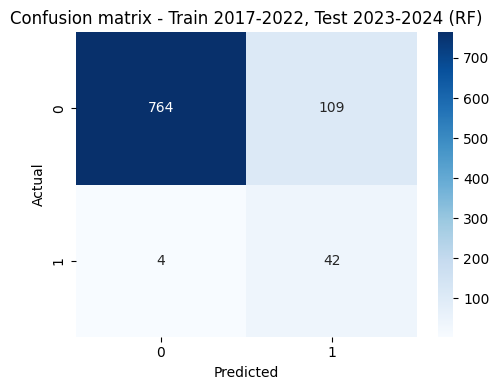

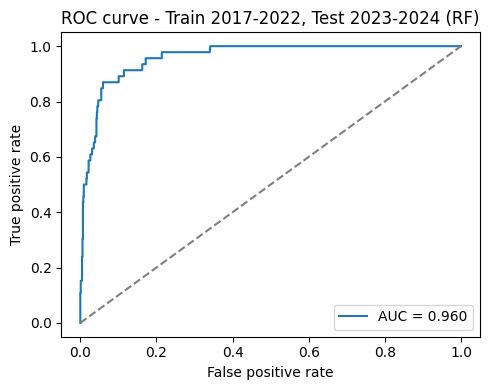

In [ ]:
# Train the Random Forest model on seasons 2017–2022
# and evaluate performance on the 2023–2024 seasons
rf_model_2324, rf_preds_2324 = run_year_split_rf(
    train_years=[2017, 2018, 2019, 2020, 2021, 2022],
    test_years=[2023, 2024],
    title="Train 2017-2022, Test 2023-2024",
)

In [ ]:
rf_preds_2324[["year", "driverName", "circuitName", "grid","y_true","y_pred", "win_proba", "norm_win_proba"]].head(20)

,year,driverName,circuitName,grid,y_true,y_pred,win_proba,norm_win_proba
2460,2023,Lewis Hamilton,Bahrain International Circuit,7,0,0,0.159416,0.039074
2461,2023,Fernando Alonso,Bahrain International Circuit,5,0,0,0.172271,0.042225
2462,2023,Nico Hülkenberg,Bahrain International Circuit,10,0,0,0.082166,0.020139
2463,2023,Sergio Pérez,Bahrain International Circuit,2,0,1,0.802590,0.196720
2464,2023,Valtteri Bottas,Bahrain International Circuit,12,0,0,0.056434,0.013832
2465,2023,Kevin Magnussen,Bahrain International Circuit,17,0,0,0.034514,0.008460
2466,2023,Max Verstappen,Bahrain International Circuit,1,1,1,0.882104,0.216210
2467,2023,Carlos Sainz,Bahrain International Circuit,4,0,0,0.208273,0.051049
2468,2023,Esteban Ocon,Bahrain International Circuit,9,0,0,0.163323,0.040032
2469,2023,Lance Stroll,Bahrain International Circuit,8,0,0,0.097241,0.023834


This table shows the Random Forest model predictions for the 2023 Bahrain Grand Prix. The model assigns almost all winning probability to Max Verstappen, correctly identifying him as the race winner, while other drivers receive near zero probabilities. This reflects the model tendency to make very confident predictions when strong signals such as pole position and dominant season performance are present.

### **5.3.2 Random Forest Evaluation on a Single Season (2021)**

Train All, Test 2021 (Random Forest)
Train years: [2017, 2018, 2019, 2020]
Test years:  [2021]
Accuracy: 0.8750
AUC:      0.9239
Brier: 0.09097111403351352

Confusion matrix:
[[365  53]
 [  2  20]]

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       418
           1       0.27      0.91      0.42        22

    accuracy                           0.88       440
   macro avg       0.63      0.89      0.68       440
weighted avg       0.96      0.88      0.90       440



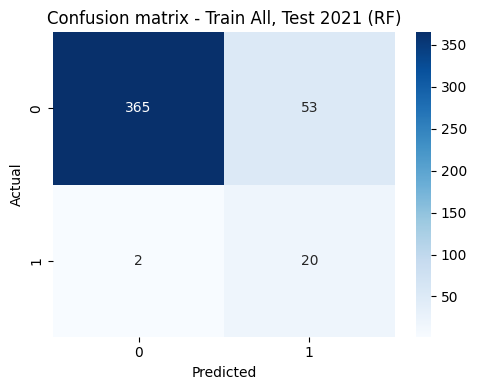

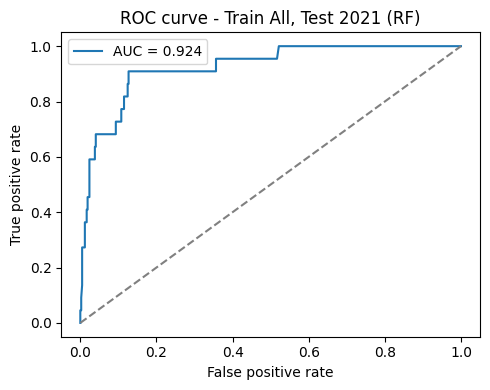

,year,driverName,circuitName,grid,y_true,y_pred,win_proba,norm_win_proba
1580,2021,Lewis Hamilton,Bahrain International Circuit,2,1,1,0.889148,0.180678
1581,2021,Fernando Alonso,Bahrain International Circuit,9,0,0,0.103982,0.021129
1582,2021,Kimi Räikkönen,Bahrain International Circuit,14,0,0,0.013815,0.002807
1583,2021,Sebastian Vettel,Bahrain International Circuit,20,0,0,0.044068,0.008955
1584,2021,Sergio Pérez,Bahrain International Circuit,0,0,1,0.769424,0.156350
1585,2021,Daniel Ricciardo,Bahrain International Circuit,6,0,0,0.274297,0.055738
1586,2021,Valtteri Bottas,Bahrain International Circuit,3,0,1,0.741237,0.150622
1587,2021,Max Verstappen,Bahrain International Circuit,1,0,1,0.765767,0.155607
1588,2021,Carlos Sainz,Bahrain International Circuit,8,0,0,0.260434,0.052921
1589,2021,Esteban Ocon,Bahrain International Circuit,16,0,0,0.071566,0.014543


In [ ]:
# Train the Random Forest model on all seasons except 2021
# and evaluate its performance on the 2021 season
rf_model_2021, rf_preds_2021 = run_year_split_rf(
    train_years=[2017, 2018, 2019, 2020],
    test_years=[2021],
    title="Train All, Test 2021",
)

# Display Random Forest predictions for the 2021 season
rf_preds_2021[
    ["year", "driverName", "circuitName", "grid",
     "y_true", "y_pred", "win_proba", "norm_win_proba"]
].head(20)

For the 2021 Bahrain Grand Prix, the Random Forest model correctly ranks Lewis Hamilton as the most likely race winner with a predicted probability of 0.89. Other front-runners such as Verstappen, Pérez, and Bottas also receive high win probabilities above 0.74, while midfield and back-marker drivers are assigned probabilities below 0.05, showing clear separation between genuine contenders and the rest of the grid.

### **5.3.3 Train All, Test 2018 (Random Forest)**

Train All, Test 2018 (Random Forest)
Train years: [2017, 2019, 2020, 2021, 2022, 2023, 2024]
Test years:  [2018]
Accuracy: 0.8857
AUC:      0.9310
Brier: 0.08722468733478331

Confusion matrix:
[[354  45]
 [  3  18]]

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       399
           1       0.29      0.86      0.43        21

    accuracy                           0.89       420
   macro avg       0.64      0.87      0.68       420
weighted avg       0.96      0.89      0.91       420



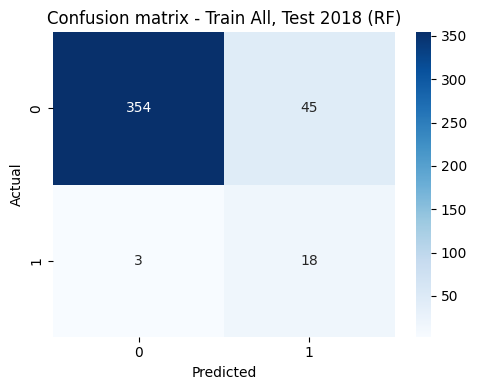

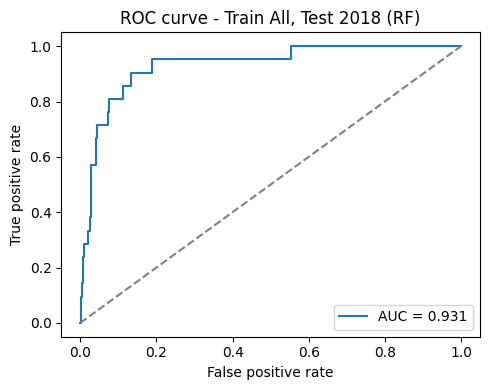

,year,driverName,circuitName,grid,y_true,y_pred,win_proba,norm_win_proba
400,2018,Lewis Hamilton,Albert Park Grand Prix Circuit,1,0,1,0.966486,0.223461
401,2018,Fernando Alonso,Albert Park Grand Prix Circuit,10,0,0,0.079631,0.018411
402,2018,Kimi Räikkönen,Albert Park Grand Prix Circuit,2,0,1,0.721472,0.166811
403,2018,Sebastian Vettel,Albert Park Grand Prix Circuit,3,1,1,0.721232,0.166756
404,2018,Romain Grosjean,Albert Park Grand Prix Circuit,6,0,0,0.069563,0.016084
405,2018,Nico Hülkenberg,Albert Park Grand Prix Circuit,7,0,0,0.077107,0.017828
406,2018,Sergio Pérez,Albert Park Grand Prix Circuit,12,0,0,0.122184,0.028250
407,2018,Daniel Ricciardo,Albert Park Grand Prix Circuit,8,0,0,0.303924,0.070270
408,2018,Valtteri Bottas,Albert Park Grand Prix Circuit,15,0,0,0.261758,0.060521
409,2018,Kevin Magnussen,Albert Park Grand Prix Circuit,5,0,0,0.099446,0.022993


In [ ]:
rf_model_2018, rf_preds_2018 = run_year_split_rf(
    train_years=[2017,2019, 2020,2021,2022,2023,2024],
    test_years=[2018],
    title="Train All, Test 2018",
)
rf_preds_2018[["year", "driverName", "circuitName", "grid","y_true","y_pred", "win_proba", "norm_win_proba"]].head(20)

For the 2018 Australian Grand Prix at Albert Park, the Random Forest model assigns an extremely high winning probability to Lewis Hamilton at 0.97, clearly identifying him as the most likely winner. Vettel and Räikkönen are ranked next with probabilities around 0.72, while the majority of the grid receives probabilities below 0.10, showing strong separation between the title contenders and the rest of the field

# **5.4 XGBoost Model**

In [ ]:
def run_year_split_xgb(train_years, test_years, title):
    # 1. Filter rows by year
    train_df = df_ml[df_ml["year"].isin(train_years)]
    test_df  = df_ml[df_ml["year"].isin(test_years)].copy()

    X_train = train_df[feature_cols]
    y_train = train_df[target_col]
    X_test  = test_df[feature_cols]
    y_test  = test_df[target_col]

    # 2. Handle class imbalance for XGBoost
    #    ratio = negatives / positives
    pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    # 3. Define XGBoost model
    model = XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=pos_weight,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1,
    )

    # 4. Fit model
    model.fit(X_train, y_train)

    # 5. Predictions
    y_pred  = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # 6. Metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(title, "(XGBoost)")
    print("Train years:", sorted(set(train_years)))
    print("Test years: ", sorted(set(test_years)))
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC:      {auc:.4f}")
    print("Brier:",    brier_score_loss(y_test, y_proba))
    print("\nConfusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification report:")
    print(classification_report(y_test, y_pred))

    # 7. Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion matrix - {title} (XGB)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # 8. ROC curve plot
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"ROC curve - {title} (XGB)")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 9. Save predictions in the test dataframe for later analysis
    test_df["y_true"]    = y_test.values
    test_df["y_pred"]    = y_pred
    test_df["win_proba"] = y_proba

    # 10. Normalise probabilities within each race
    test_df["race_sum"] = (
        test_df.groupby(["year", "round"])["win_proba"].transform("sum")
    )
    test_df["norm_win_proba"] = test_df["win_proba"] / test_df["race_sum"]

    return model, test_df


### **5.4.1 Train 2017-2022, Test 2023-2024**

Train 2017-2022, Test 2023-2024 (XGBoost)
Train years: [2017, 2018, 2019, 2020, 2021, 2022]
Test years:  [2023, 2024]
Accuracy: 0.9423
AUC:      0.9376
Brier: 0.05011489042095121

Confusion matrix:
[[837  36]
 [ 17  29]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       873
           1       0.45      0.63      0.52        46

    accuracy                           0.94       919
   macro avg       0.71      0.79      0.75       919
weighted avg       0.95      0.94      0.95       919



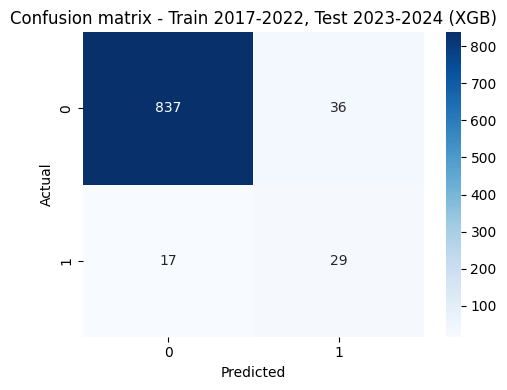

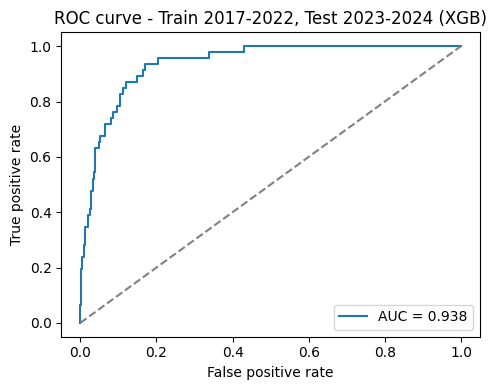

,year,driverName,circuitName,grid,y_true,y_pred,win_proba,norm_win_proba
2460,2023,Lewis Hamilton,Bahrain International Circuit,7,0,0,0.000915,0.000343
2461,2023,Fernando Alonso,Bahrain International Circuit,5,0,0,0.010363,0.003879
2462,2023,Nico Hülkenberg,Bahrain International Circuit,10,0,0,0.001656,0.000620
2463,2023,Sergio Pérez,Bahrain International Circuit,2,0,1,0.673012,0.251947
2464,2023,Valtteri Bottas,Bahrain International Circuit,12,0,0,0.000762,0.000285
2465,2023,Kevin Magnussen,Bahrain International Circuit,17,0,0,0.000083,0.000031
2466,2023,Max Verstappen,Bahrain International Circuit,1,1,1,0.993001,0.371737
2467,2023,Carlos Sainz,Bahrain International Circuit,4,0,0,0.000848,0.000317
2468,2023,Esteban Ocon,Bahrain International Circuit,9,0,0,0.008828,0.003305
2469,2023,Lance Stroll,Bahrain International Circuit,8,0,0,0.027769,0.010395


In [ ]:
xgb_model_2324, xgb_preds_2324 = run_year_split_xgb(
    train_years=[2017, 2018, 2019, 2020, 2021, 2022],
    test_years=[2023, 2024],
    title="Train 2017-2022, Test 2023-2024",
)
xgb_preds_2324[["year", "driverName", "circuitName", "grid","y_true","y_pred", "win_proba", "norm_win_proba"]].head(20)


For the 2023 Bahrain Grand Prix, the XGBoost model assigns an overwhelming winning probability of 0.99 to Max Verstappen, correctly identifying him as the dominant favourite. Charles Leclerc and Sergio Pérez follow with high probabilities of 0.95 and 0.67, while the rest of the grid is assigned near-zero values, showing the model’s strong confidence in the Red Bull–Ferrari front-runner hierarchy at the start of the season.

### **5.4.2 Train All Test 2022 (XGBoost)**

Train All Test 2022 (XGBoost)
Train years: [2017, 2018, 2019, 2020, 2021]
Test years:  [2022]
Accuracy: 0.9341
AUC:      0.9408
Brier: 0.051286316584940164

Confusion matrix:
[[397  21]
 [  8  14]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       418
           1       0.40      0.64      0.49        22

    accuracy                           0.93       440
   macro avg       0.69      0.79      0.73       440
weighted avg       0.95      0.93      0.94       440



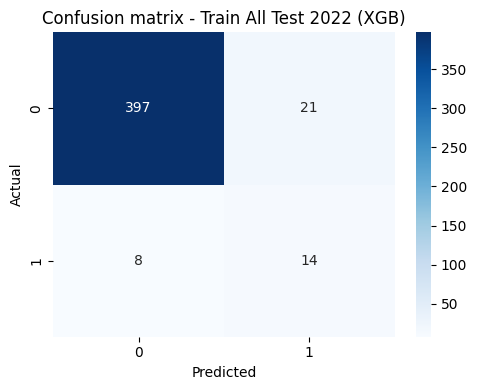

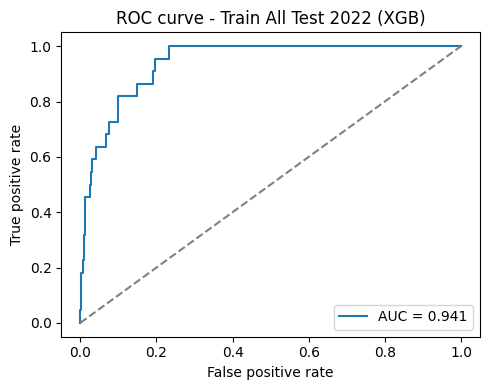

,year,driverName,circuitName,grid,y_true,y_pred,win_proba,norm_win_proba
2020,2022,Lewis Hamilton,Bahrain International Circuit,5,0,0,0.108637,0.047420
2021,2022,Fernando Alonso,Bahrain International Circuit,8,0,0,0.004830,0.002108
2022,2022,Nico Hülkenberg,Bahrain International Circuit,17,0,0,0.000161,0.000070
2023,2022,Sergio Pérez,Bahrain International Circuit,4,0,0,0.002846,0.001242
2024,2022,Daniel Ricciardo,Bahrain International Circuit,18,0,0,0.000493,0.000215
2025,2022,Valtteri Bottas,Bahrain International Circuit,6,0,0,0.004439,0.001938
2026,2022,Kevin Magnussen,Bahrain International Circuit,7,0,0,0.000563,0.000246
2027,2022,Max Verstappen,Bahrain International Circuit,2,0,1,0.600101,0.261945
2028,2022,Carlos Sainz,Bahrain International Circuit,3,0,1,0.595446,0.259914
2029,2022,Esteban Ocon,Bahrain International Circuit,11,0,0,0.000594,0.000259


In [ ]:
xgb_model_2022, xgb_preds_2022 = run_year_split_xgb(
    train_years=[2017,2018,2019,2020,2021],
    test_years=[2022],
    title="Train All Test 2022",
)
xgb_preds_2022[["year", "driverName", "circuitName", "grid","y_true","y_pred", "win_proba", "norm_win_proba"]].head(20)

For the 2022 Bahrain Grand Prix, the XGBoost model assigns the highest winning probability to Charles Leclerc at 0.94, correctly identifying him as the race winner. Verstappen and Sainz follow closely with probabilities around 0.60, while the remainder of the grid is given near-zero values, showing strong separation between the genuine front-runners and the rest of the field.

### **5.4.3 Train All, Test 2019 (XGBoost)**

Train All, Test 2019 (XGBoost)
Train years: [2017, 2018, 2020, 2021, 2022, 2023, 2024]
Test years:  [2019]
Accuracy: 0.9262
AUC:      0.9132
Brier: 0.06241798461741455

Confusion matrix:
[[378  21]
 [ 10  11]]

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       399
           1       0.34      0.52      0.42        21

    accuracy                           0.93       420
   macro avg       0.66      0.74      0.69       420
weighted avg       0.94      0.93      0.93       420



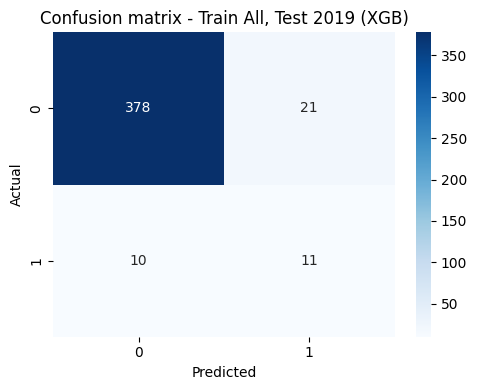

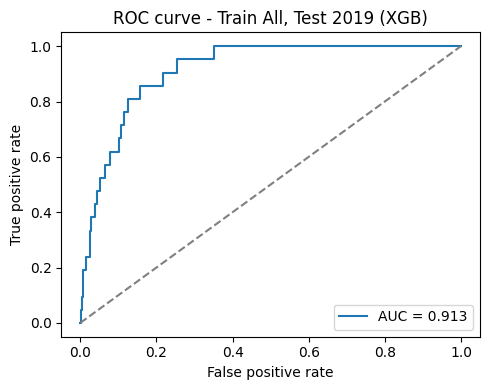

In [ ]:
xgb_model_2019, xgb_preds_2019 = run_year_split_xgb(
    train_years=[2017,2018,2020,2021,2022,2023,2024],
    test_years=[2019],
    title="Train All, Test 2019",
)

In [ ]:
xgb_preds_2019[["year", "driverName", "circuitName", "grid","y_true","y_pred", "win_proba", "norm_win_proba"]].head(20)

,year,driverName,circuitName,grid,y_true,y_pred,win_proba,norm_win_proba
820,2019,Lewis Hamilton,Albert Park Grand Prix Circuit,1,0,1,0.996834,0.661837
821,2019,Kimi Räikkönen,Albert Park Grand Prix Circuit,9,0,0,0.000123,0.000081
822,2019,Robert Kubica,Albert Park Grand Prix Circuit,20,0,0,0.000053,0.000035
823,2019,Sebastian Vettel,Albert Park Grand Prix Circuit,3,0,0,0.026898,0.017858
824,2019,Romain Grosjean,Albert Park Grand Prix Circuit,6,0,0,0.003227,0.002143
825,2019,Nico Hülkenberg,Albert Park Grand Prix Circuit,11,0,0,0.008763,0.005818
826,2019,Sergio Pérez,Albert Park Grand Prix Circuit,10,0,0,0.010694,0.007100
827,2019,Daniel Ricciardo,Albert Park Grand Prix Circuit,12,0,0,0.000098,0.000065
828,2019,Valtteri Bottas,Albert Park Grand Prix Circuit,2,1,0,0.360835,0.239572
829,2019,Kevin Magnussen,Albert Park Grand Prix Circuit,7,0,0,0.000551,0.000366


For the 2019 Australian Grand Prix, the model confidently predicts Lewis Hamilton as the race winner, assigning him the highest normalised win probability. However, the actual winner was Valtteri Bottas. This illustrates a key limitation of pre-race modelling, where strong historical and qualifying signals can lead the model to favour a dominant driver, yet unpredictable race-day factors can still overturn the expected outcome.

# **5.5 Overall Results**

LR: Train 2017-2022, Test 2023-2024
Train years: [2017, 2018, 2019, 2020, 2021, 2022]
Test years:  [2023, 2024]
Accuracy: 0.8281
AUC:      0.9411
Brier: 0.11506263200060633

Confusion matrix:
[[718 155]
 [  3  43]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       873
           1       0.22      0.93      0.35        46

    accuracy                           0.83       919
   macro avg       0.61      0.88      0.63       919
weighted avg       0.96      0.83      0.87       919



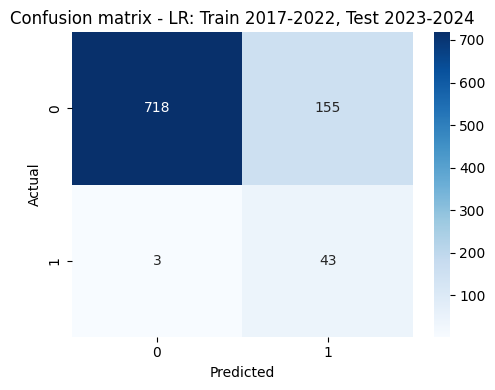

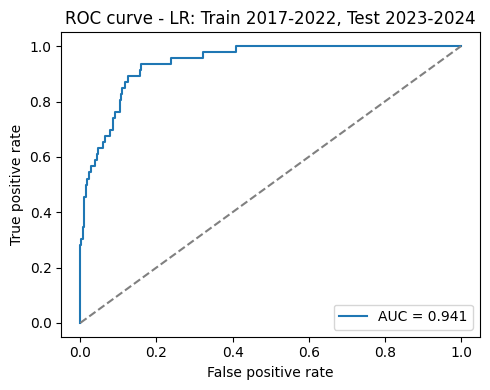

RF: Train 2017-2022, Test 2023-2024 (Random Forest)
Train years: [2017, 2018, 2019, 2020, 2021, 2022]
Test years:  [2023, 2024]
Accuracy: 0.8770
AUC:      0.9598
Brier: 0.07805619564889087

Confusion matrix:
[[764 109]
 [  4  42]]

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       873
           1       0.28      0.91      0.43        46

    accuracy                           0.88       919
   macro avg       0.64      0.89      0.68       919
weighted avg       0.96      0.88      0.91       919



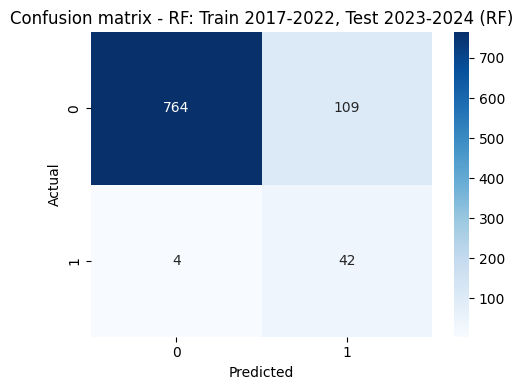

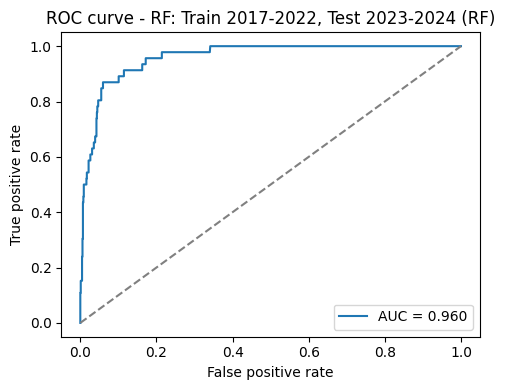

XGB: Train 2017-2022, Test 2023-2024 (XGBoost)
Train years: [2017, 2018, 2019, 2020, 2021, 2022]
Test years:  [2023, 2024]
Accuracy: 0.9423
AUC:      0.9376
Brier: 0.05011489042095121

Confusion matrix:
[[837  36]
 [ 17  29]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       873
           1       0.45      0.63      0.52        46

    accuracy                           0.94       919
   macro avg       0.71      0.79      0.75       919
weighted avg       0.95      0.94      0.95       919



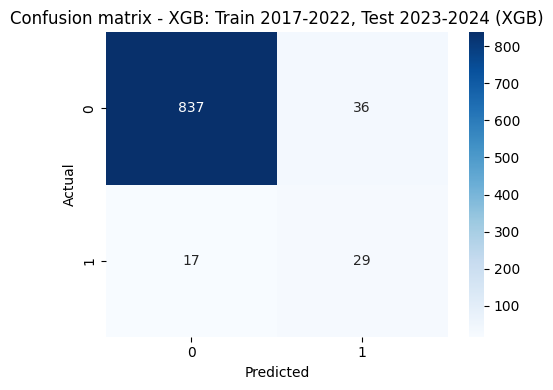

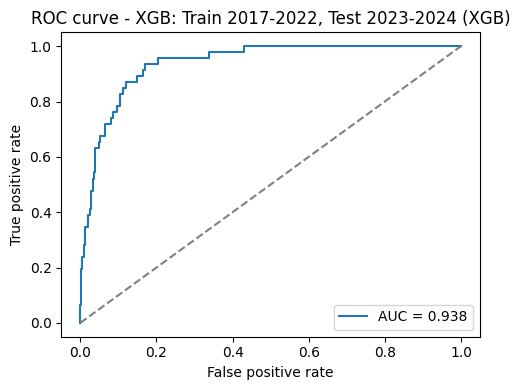

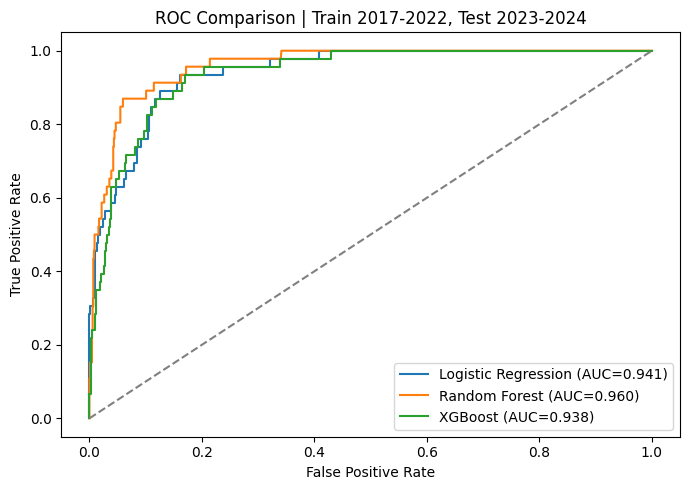

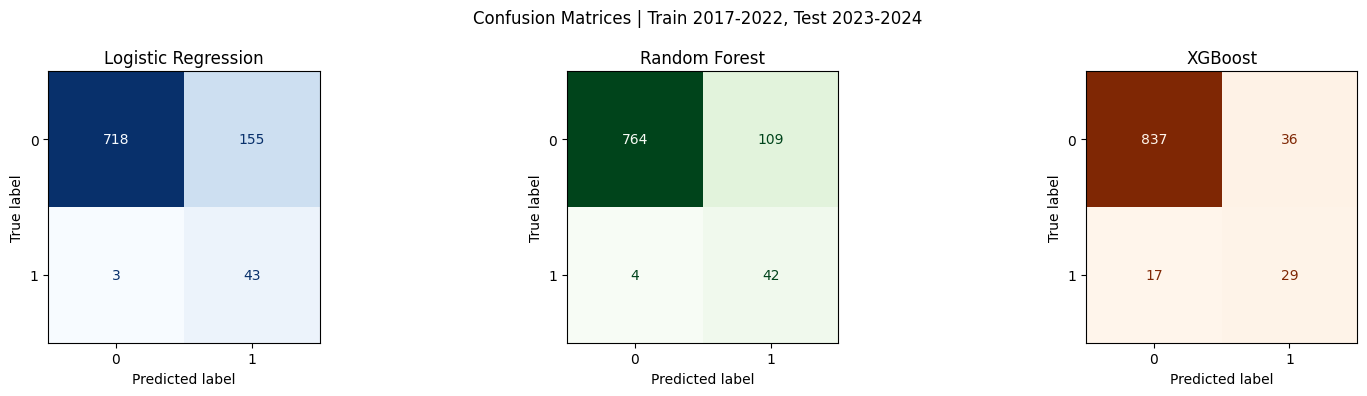

In [ ]:
# Use older seasons for training and recent seasons for testing to avoid data leakage
train_years = [2017, 2018, 2019, 2020, 2021, 2022]
test_years  = [2023, 2024]

# Train all models with the same temporal split
lr_model,  lr_preds  = run_year_split(train_years, test_years, "LR: Train 2017-2022, Test 2023-2024")
rf_model,  rf_preds  = run_year_split_rf(train_years, test_years, "RF: Train 2017-2022, Test 2023-2024")
xgb_model, xgb_preds = run_year_split_xgb(train_years, test_years, "XGB: Train 2017-2022, Test 2023-2024")

# Collect predictions for unified evaluation
preds_dict = {
    "Logistic Regression": lr_preds,
    "Random Forest": rf_preds,
    "XGBoost": xgb_preds
}

# ROC Curve Comparison
plt.figure(figsize=(7, 5))
for name, p in preds_dict.items():
    y_true  = p["y_true"].astype(int).values
    y_proba = p["win_proba"].values

    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)

    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Comparison | Train 2017-2022, Test 2023-2024")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

# Confusion Matrices Side by Side
cmaps = {
    "Logistic Regression": "Blues",
    "Random Forest": "Greens",
    "XGBoost": "Oranges"
}
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for ax, (name, p) in zip(axes, preds_dict.items()):
    y_true = p["y_true"].astype(int).values
    y_pred = p["y_pred"].astype(int).values
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, values_format="d", cmap=cmaps[name], colorbar=False)
    ax.set_title(name)
plt.suptitle("Confusion Matrices | Train 2017-2022, Test 2023-2024", fontsize=12)
plt.tight_layout()
plt.show()


The ROC curve comparison shows that Random Forest achieves the highest AUC of 0.960, outperforming Logistic Regression at 0.941 and XGBoost at 0.938, indicating superior overall ability to rank true race winners above non-winners.

The confusion matrices further highlight behavioural differences. Logistic Regression predicts many winners, capturing most true positives but producing a large number of false alarms. XGBoost is highly conservative, generating very few false positives but missing several actual winners. Random Forest provides the best balance, correctly identifying most winners while significantly reducing false positives, making it the most reliable and practically useful model for race-winner prediction.